# Visual Inspection  of Health Center-RRL and Referral Hospital RRL & Cardsheet  Clinical Data

This is a part of a Ph.D research project entitled with "Developing clincal decision support point of care instrument for low resource settings". It's supervised by  Bart Jansen (Prof), Frank Verbeke (Prof), Jan Cornelis (Prof), Girum Ketema (Ass.Prof) and Demesewu Amenu (Associate Prof). 
  

# Ehtiopian Primary Health System (Highlights) 

1. The public health  care system in Ethiopia is structured around the concept of a “health network model” that uses a three tiered health care delivery levels namely primary, secondary and tertiary levels with defined populations to be served at each level.  

2. For rural settings at the base is the primary health care unit that is a health centre with five satellite health posts catering to a population of 25,000; followed by  a primary hospital, serving a population of  60,000 to 100,000; and next a general  hospital, providing services to 1 up to 1.5 million beneficiaries.  For urban setting at the base is a health center serving 40,000 people, followed by a general hospital as in the rural setting. At the apex of both structures is specialized hospital which serves 3.5 to 5 million people


In [8]:
#importing the required labraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import holoviews as hv
import datashader as ds
import dask as dask
import bokeh as bokeh
#import chart_studio.plotly as py
import holoviews as hv
import datashader as ds
import dask as dask
import bokeh as bokeh
import cufflinks as cf


import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)
import ipywidgets as widgets
from ipywidgets import SelectionSlider
from ipywidgets import interact, interact_manual
import os
from IPython.display import Image
from PIL import ImageDraw 

# Reference file used to explore referral flow  

The diagram below is constucted based on the Federal Ministry of Health of Ethiopia referral network documents and guidlines. It aims to create or improve liaison services and that of the referral network so that effective  utilization of health care services resources to ensure provision of better quality of care. It will targets all liaison officers, health service providers, facility managers and other stake holders.

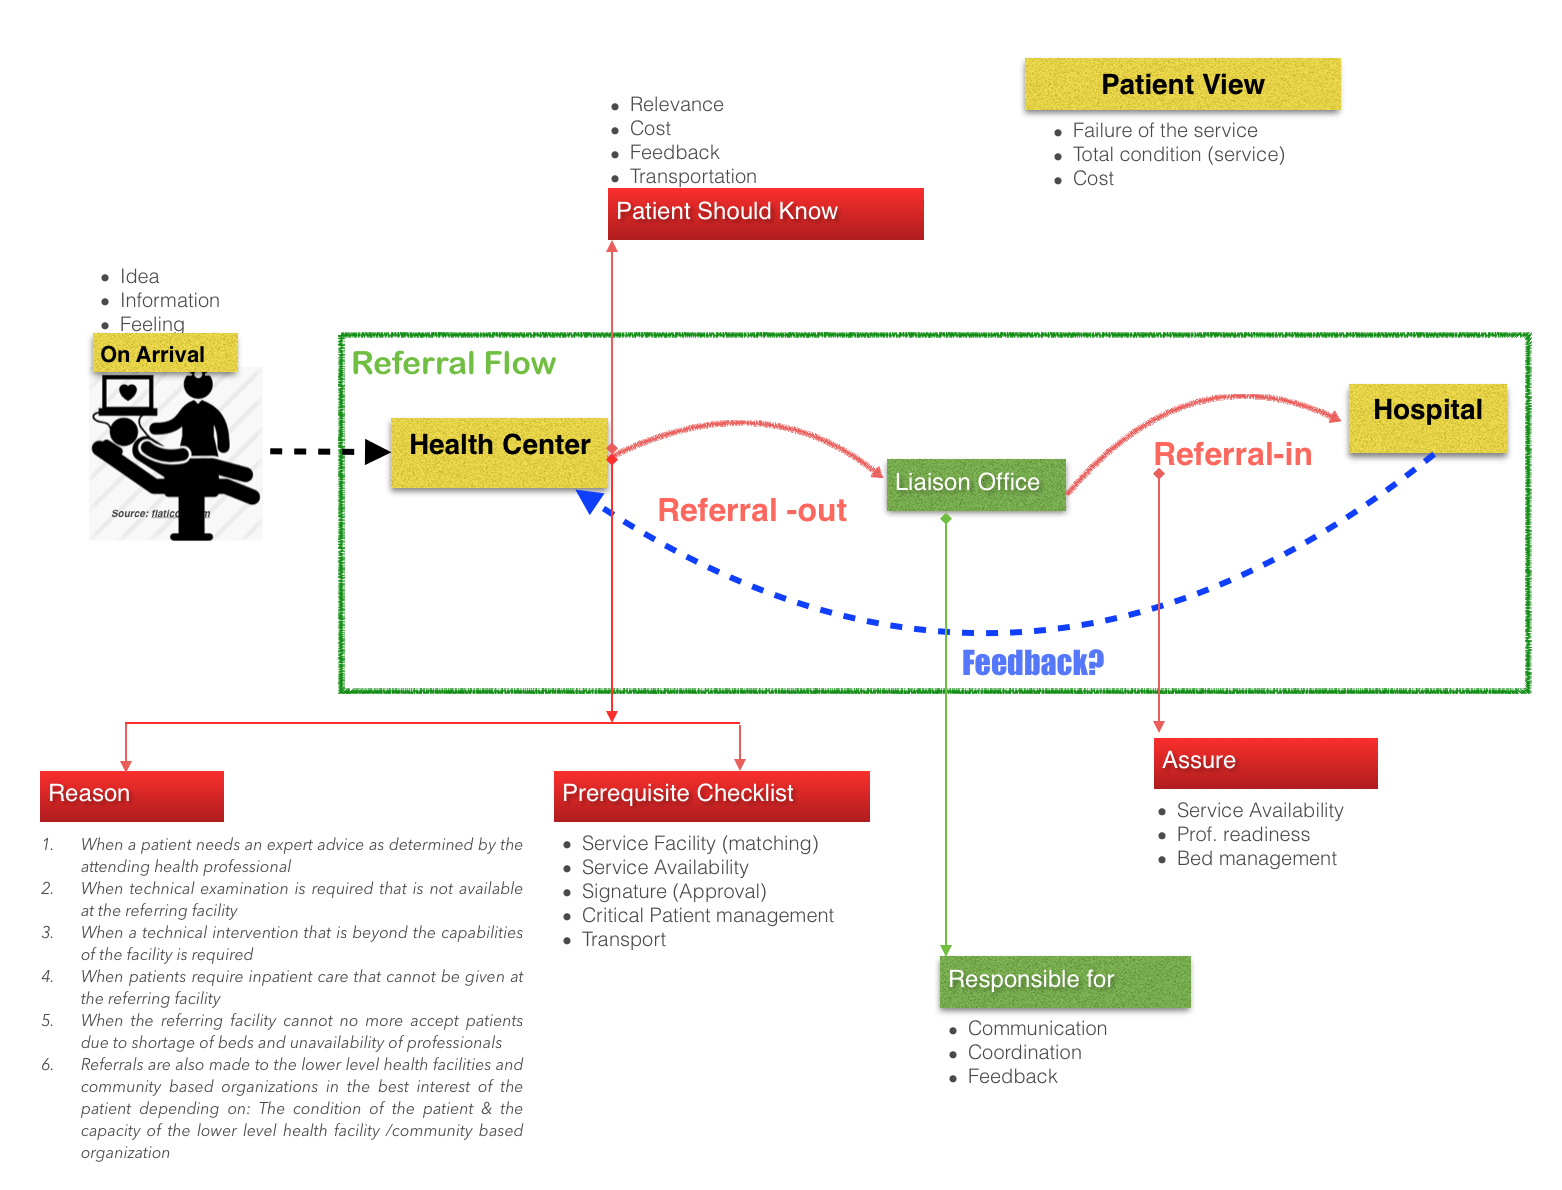

In [16]:
fdir='images/'
#@interact
#def show_images(referenceFile=os.listdir(fdir)):
 #   display(Image(fdir+referenceFile,width=100, height=100)) 
Image(filename='referralFlow.png') 

In [24]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 


original = Image.open("referralFlow.png")
draw = ImageDraw.Draw(original)
draw.text((100, 100),"Sample Text")
#original. save("with_text.png")

# Facts and challenges of the referral service 

1. Patient view the referral as a failure of the service, severe case, extra cost and so on. 
2. Matching the facility or the service based on the patients' condition is challenging. A need to deliver automated and evidence based service directory, matching, management, and readiness. 
3. Reduce delay for mitigating the complication of critical patient management e.g. cost, infrastructure, service, and transportation 
5. Getting feedback e.g. the health center is challenged to get feedback from hospital  

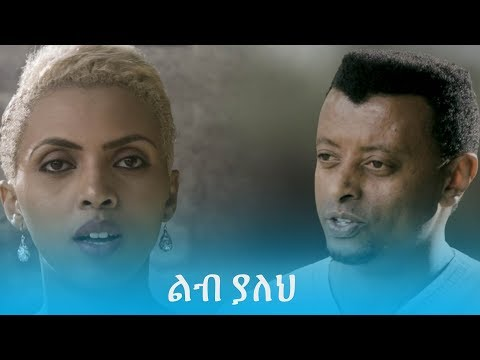

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('rsOeJFYro2Y', start=13)

# Q ? 

Inspecting the CGs, RRL and patient card-sheet to uncover:
1. How the referral decision is made. 
2. What cases are referred to the next level? 
3. Is it appropriate referral or not
4. pattern for exploring the referral flow and mathcing e.g.explore findings that point to more than one disease. We call it "conisderation path or crossroad PLUS(+) referral"
5. What are the missed feedback. e.g. compute agreggated matrix b/n RRL-out and RRL-in Form  

# Part- I: Health Center RRL

# Importing the CSV dataset

In [25]:
#import health center RRL 
#hchcrrldfrrldata = pd.read_csv("HC RRL-Table 1.csv", encoding='utf-8')
#hcrrldf = pd.read_csv("JHC_RRL-1.csv", encoding='utf-8')
   
#import the health cetner RRL (wit ICPC-2 and ICD11 format)

hcrrldf = pd.read_csv("HC_ICD11_RRL-Table 1.csv", encoding='utf-8')


In [26]:
hcrrldf.shape

(459, 20)

In [27]:
hcrrldf

,S.No,Age,Sex,Reffering_Organization,Refered_to,Reason_for_Referral_Trans,DiseaseName,ICPC2_Classfication,CP,Reason_ for_ Referral,Feed_Back,ID,Date,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions
0,1,28,F,Jimma Health Center,Jimma UNV Medical Center,For better management,prolonged 2nd stage of labor,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,42501,26/12/2009,JB03.1 Prolonged second stage of labour,JB03 Long labour,prolonged,prolonged second stage of labour,protracted second stage of labour,NaN,The fetus has not been delivered after the cer...
1,2,25,F,Jimma Health Center,Jimma UNV Medical Center,For better management,Negetive Fetal Heart Beat,Cardiovascular,refer,For Better Mang,NaN,71092,28/12/2009,JB07.0 Labour or delivery complicated by foeta...,JB07 Labour or delivery complicated by foetal ...,Fetal heart rate irregularity,abnormal heart rate,fetal heart rate,NaN,A condition characterised by an abnormal foeta...
2,3,25,F,Jimma Health Center,Jimma UNV Medical Center,For better management,Preterm,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,65021,30/12/2009,KA21.4 Preterm newborn,KA21 Disorders of newborn related to short ges...,birth premature,Preterm newborn,Premature baby,"other preterm infants, unspecified",Preterm: <37 weeks or 259 days gestation.
3,4,27,F,Jimma Health Center,Jimma UNV Medical Center,For better management,Preterm,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,14578,1/13/2009,KA21.4 Preterm newborn,KA21 Disorders of newborn related to short ges...,birth premature,Preterm newborn,Premature baby,"other preterm infants, unspecified",Preterm: <37 weeks or 259 days gestation.
4,5,29,F,Jimma Health Center,Jimma UNV Medical Center,For better management,For Prolonged Active first stage of labor,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,74125,1/13/2009,JB03.1 Prolonged second stage of labour,JB03 Long labour,prolonged,prolonged first stage of labour,protracted first stage of labour,NaN,The first stage of labour where cervical dilat...
5,6,18,F,Jimma Health Center,Jimma UNV Medical Center,For better management,prolonged force labour,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,75306,20/1/2010,"JB03.Z Long labour, unspecified",JB03 Long labour,prolonged,prolonged labour,NaN,NaN,NaN
6,7,17,F,Jimma Health Center,Jimma UNV Medical Center,For better management,Post term,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,69582,20/1/2010,KA22.2 Post-term newborn,KA22 Disorders of newborn related to long gest...,postterm,Postmaturity NOS,postmature pregnancy\ny,postmaturity affecting management of pregnanc,A condition of the newborn characterized by a ...
7,8,28,F,Jimma Health Center,Jimma UNV Medical Center,For better management,prolonged active first stage of labor,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,73003,20/1/2010,"Pregnancy, Childbearing,Family Planning",JB03.0 Prolonged first stage of labour,JB03 Long labour,prolonged,prolonged first stage of labour,protracted first stage of labour,The first stage of labour where cervical dilat...
8,9,30,F,Jimma Health Center,Jimma UNV Medical Center,For better management,malpresentation of labour,"Pregnancy, Childbearing,Family Planning",refer,For Better Mang,NaN,68322,20/1/2009,JA82.1 Maternal care for breech presentation,JA82 Maternal care for known or suspected malp...,breech presentation,breech fetal presentation,positions of breech presentation,malposition of fetus in breech presentation,NaN
9,10,28,F,Jimma Health Center,Jimma UNV Medical Center,For Further Investigation,PROM,"Pregnancy, Childbearing,Family Planning",refer,for further invstigation,NaN,21412,26/1/2009,JA89.Z\nMaternal care related to premature rup...,"Maternal care related to the foetus, amniotic ...",PROM,premature rupture of membranes,-,-,"Related to or aggravated by the pregnan

In [28]:
#hcrrldf['Date'] = hcrrldf['Date'].replace(['29/2/2010'],'28/2/2010')

In [29]:
hcrrldf['Date']

0      26/12/2009
1      28/12/2009
2      30/12/2009
3       1/13/2009
4       1/13/2009
5       20/1/2010
6       20/1/2010
7       20/1/2010
8       20/1/2009
9       26/1/2009
10      28/1/2009
11       2/2/2010
12       2/2/2010
13       3/2/2010
14       4/2/2010
15       5/2/2010
16       9/2/2010
17      10/2/2010
18      11/2/2010
19      12/2/2010
20      23/2/2010
21      13/2/2010
22      15/2/2010
23      15/2/2010
24      16/2/2010
25      23/2/2010
26      24/2/2010
27      27/2/2010
28      28/2/2010
29      29/2/2010
          ...    
429    30/11/2011
430    30/11/2011
431     1/12/2011
432     1/12/2011
433     2/12/2011
434     2/12/2011
435       2/12/11
436     3/12/2011
437     3/12/2011
438     4/12/2011
439     4/12/2011
440     5/12/2011
441     5/12/2011
442     5/12/2011
443     6/12/2011
444     6/12/2011
445     8/12/2011
446     8/12/2011
447     8/12/2011
448     9/12/2011
449    10/12/2011
450    11/12/2011
451    11/12/2011
452    11/12/2011
453    12/

<AxesSubplot:>

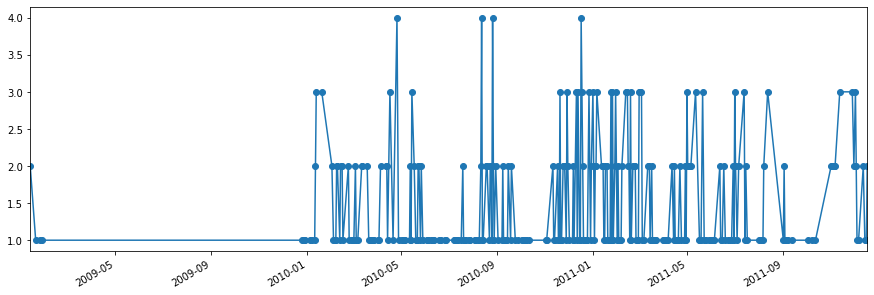

In [30]:
hcrrldf['Date'] = pd.to_datetime(hcrrldf['Date'], errors='coerce')
hcrrldf['Date'].value_counts().plot( marker='o', linestyle='-', figsize=(15, 5))

In [31]:
start, end = '2/2/2010', '17/12/2011'
xx = hcrrldf['Date'].loc[start:end]
xx

Series([], Name: Date, dtype: datetime64[ns])

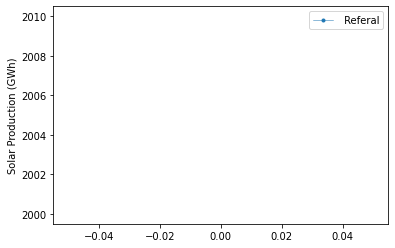

In [32]:
start, end = '2/2/2010', '17/12/2011'
hcrrldf['Date'] = pd.to_datetime(hcrrldf['Date'], errors='coerce')
fig, ax = plt.subplots()
ax.plot(hcrrldf['Date'].loc[start:end],
        marker='.', linestyle='-', linewidth=0.5, label=' Referal')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

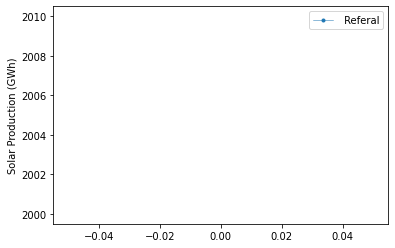

In [33]:
# Start and end of the date range to extract
start, end = '2/2/2010', '17/12/2011'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(hcrrldf.loc[start:end, 'Date'],
marker='.', linestyle='-', linewidth=0.5, label=' Referal')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [34]:
#interacting with the raw healthcenter CSV dataset
@interact
def show_referral_by_age(column=["Age"],x=(5,100,5)):
    return hcrrldf.loc[hcrrldf[column] >x]

,S.No,Age,Sex,Reffering_Organization,Refered_to,Reason_for_Referral_Trans,DiseaseName,ICPC2_Classfication,CP,Reason_ for_ Referral,Feed_Back,ID,Date,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions
93,94,88,F,Jimma Health Center,Jimma UNV Medical Center,For further management,Post term,"Pregnancy, Childbearing,Family Planning",refer,for further mngt,NaN,800213,2010-09-07,KA22.2 Post-term newborn,KA22 Disorders of newborn related to long gest...,postterm,Postmaturity NOS,postmature pregnancy\ny,postmaturity affecting management of pregnanc,A condition of the newborn characterized by a ...
228,227,2423,F,Jimma Health Center,Jimma UNV Medical Center,For better management,membrane rupture,"Pregnancy, Childbearing,Family Planning",refer,for better mngt,NaN,71255,2010-02-13,JA89 Maternal care related to premature ruptur...,"Maternal care related to the foetus, amniotic ...",PROM,preterm rupture of membranes,Maternal care related to premature rupture of ...,NaN,Spontaneous rupture of fetal membranes before ...


In [35]:
hcrrldf['Reffering_Organization'].value_counts()

Jimma Health Center    459
Name: Reffering_Organization, dtype: int64

# Spliting Date into Day-Month-Year

In [36]:
#Splitting the date into year, month and date
hcrrldf['Date'] = pd.to_datetime(hcrrldf.Date,errors='coerce')
hcrrldf['Day'],hcrrldf['Month'],hcrrldf['Year'] = hcrrldf.Date.dt.day, hcrrldf.Date.dt.month, hcrrldf.Date.dt.year

#display the new RRL list  
@interact
def show_referral_by_age(column=["Age","Year","Month"],x=(5,200,5)):
    return hcrrldf.loc[hcrrldf[column] >x]

#df.shape

,S.No,Age,Sex,Reffering_Organization,Refered_to,Reason_for_Referral_Trans,DiseaseName,ICPC2_Classfication,CP,Reason_ for_ Referral,...,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions,Day,Month,Year
228,227,2423,F,Jimma Health Center,Jimma UNV Medical Center,For better management,membrane rupture,"Pregnancy, Childbearing,Family Planning",refer,for better mngt,...,JA89 Maternal care related to premature ruptur...,"Maternal care related to the foetus, amniotic ...",PROM,preterm rupture of membranes,Maternal care related to premature rupture of ...,NaN,Spontaneous rupture of fetal membranes before ...,13.0,2.0,2010.0


# RRL  flitering by referral reason 

In [37]:
# Pop-up the RRL by referral reason only .... filter function is required 

#Step-1: a generic fucntion is rquired to capture uniques unique values 
ALL = 'ALL' 
def unique_sorted_values(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#Step-2: intialize a variable to capture the referral reason
reason4Referral = widgets.Dropdown(options =unique_sorted_values(hcrrldf.Reason_for_Referral_Trans),description="Ref. Reason")


referral_reason_output = widgets.Output()

#Step-3: Write an event-handeler function     
def referral_reason_eventhandler(change):
    referral_reason_output.clear_output() #the output didn't refersh when selecting a new referral reason rather it will append at the end
    with referral_reason_output:
        if (change.new == ALL):
            display(hcrrldf)
        else:
            display(hcrrldf[hcrrldf.Reason_for_Referral_Trans == change.new])
            
#Step-4 : Bind to the event handler to the dropdown value  
reason4Referral.observe(referral_reason_eventhandler, names='value')

# Step-5: Display the result
display(reason4Referral)
display(referral_reason_output)

Dropdown(description='Ref. Reason', options=('ALL', 'For Further Investigation ', 'For better management  ', '…

Output()

# Finding the correlations between two columns 

In [38]:
@interact 
def correlations(column1=list(hcrrldf.select_dtypes('number').columns),
                column2=list(hcrrldf.select_dtypes('number').columns)):
    print(f"Correlation: {hcrrldf[column1].corr(hcrrldf[column2])}")
    
    
#need of the developing co-relation matrix for each attributes 

Correlation: 1.0


 # RRL Data Visualization  

1. Visualization of RRL by Age

<AxesSubplot:title={'center':'Referral Registration Logbook'}, xlabel='Age', ylabel='Summary'>

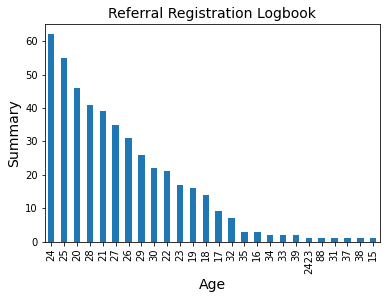

In [39]:
rage = hcrrldf.Age
xp = rage.value_counts()
plt.title('Referral Registration Logbook', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Summary', fontsize=14)
xp.plot(kind='bar')

In [75]:
# There is two typing eror values 
#Replace the average  Age  
avrAge=hcrrldf['Age'].mean()
#Replacing the two raws with an Average age value i.e. 2423 and 88
hcrrldf.Age.replace([2423,88],29, inplace=True)

<AxesSubplot:title={'center':'Referral Registration Logbook'}, xlabel='Age', ylabel='Summary'>

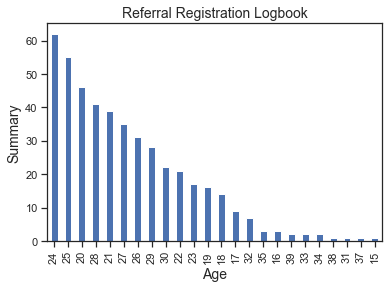

In [76]:
# The new distruption of Age is looks like follows
rage = hcrrldf.Age
xp = rage.value_counts()
plt.title('Referral Registration Logbook', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Summary', fontsize=14)
xp.plot(kind='bar')

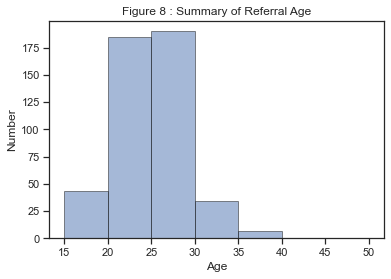

In [77]:
commute_times = hcrrldf.Age
bin_edges= [15,20,25,30,35,40,45,50]
plt.hist(commute_times,
         bins=bin_edges,
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Figure 8 : Summary of Referral Age')


plt.show()

In [78]:
commute_times.value_counts()

24    62
25    55
20    46
28    41
21    39
27    35
26    31
29    28
30    22
22    21
23    17
19    16
18    14
17     9
32     7
35     3
16     3
39     2
33     2
34     2
38     1
31     1
37     1
15     1
Name: Age, dtype: int64

2. Interactive visulization: Inspecting numberic attributs at  the RRL dataset

In [44]:
#building scatter plot for numeric values 
themes=cf.getThemes()

#exclude or replace the nan value in the feed back column 

hcrrldf['Feed_Back'] = hcrrldf['Feed_Back'].replace(np.nan, "Missed Value")

@interact
def scatter_plot(x=list(hcrrldf.select_dtypes('number').columns), 
                 y=list(hcrrldf.select_dtypes('number').columns)[1:],
                 #theme=list(cf.themes.THEMES.keys()), 
                 theme=list(cf.getThemes()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    hcrrldf.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='DiseaseName',
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)



3. Interactive visulization: Inspecting objects or catagorical attributes at  the RRL dataset using graphs

In [45]:
def is_categorical(Referring_Organization):
    return Referring_Organization.dtype.name == 'category'

 #hcrrldf.Referring_Organization.dtype.name

In [46]:
#building Histogram for categorical values or objects 
@interact 
def hist(x=list(hcrrldf.select_dtypes('object').columns),
                 #theme=list(cf.themes.THEMES.keys()), 
                 theme=list(cf.getThemes()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    hcrrldf[x].iplot(kind='hist', x=x, mode='markers', xTitle='x',
                   yTitle='count', title='Distribution',
                   theme=theme, colorscale=colorscale)

4. Exploring the frequencey based on certain attributes using crosstab. This helps to visulize the frequencey of the flow of refferal based on the two selected data attributes.

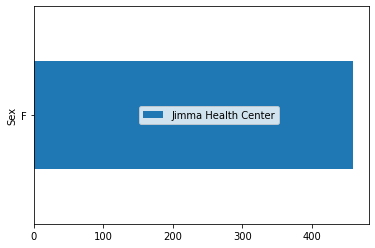

In [47]:
#Implmentaitng cross tab between two variables 
@interact 
def crosstab(x=list(hcrrldf.select_dtypes('object').columns), 
             y=list(hcrrldf.select_dtypes('object').columns)[1:],
             theme=list(cf.getThemes()), 
             colorscale=list(cf.colors._scales_names.keys())):
    pd.crosstab(hcrrldf[x],hcrrldf[y]).plot.barh().legend(loc='center left', bbox_to_anchor=(0.3, 0.5))


Text(0, 0.5, 'Referral Reason')

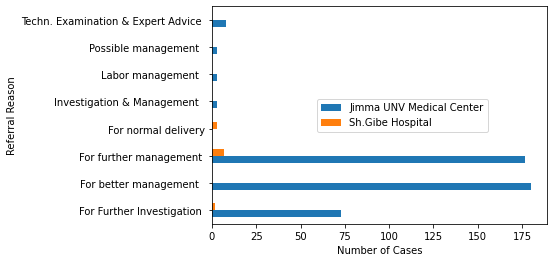

In [48]:
pd.crosstab(hcrrldf['Reason_for_Referral_Trans'],hcrrldf['Refered_to']).plot.barh().legend(loc='center left', bbox_to_anchor=(0.3, 0.5))
plt.xlabel('Number of Cases')
plt.ylabel('Referral Reason')

In [49]:
hcrrldf['Reason_for_Referral_Trans'].value_counts(normalize=True)*100

For further management                 40.087146
For better management                  39.215686
For Further Investigation              16.339869
Techn. Examination & Expert Advice      1.742919
Investigation & Management              0.653595
Labor management                        0.653595
Possible management                     0.653595
For normal delivery                     0.653595
Name: Reason_for_Referral_Trans, dtype: float64

5. Exploring the frequencey or the summary of based on a certain attributes using catplot. This helps to visulize the frequencey of the flow of refferal based on the three selected data attributes.

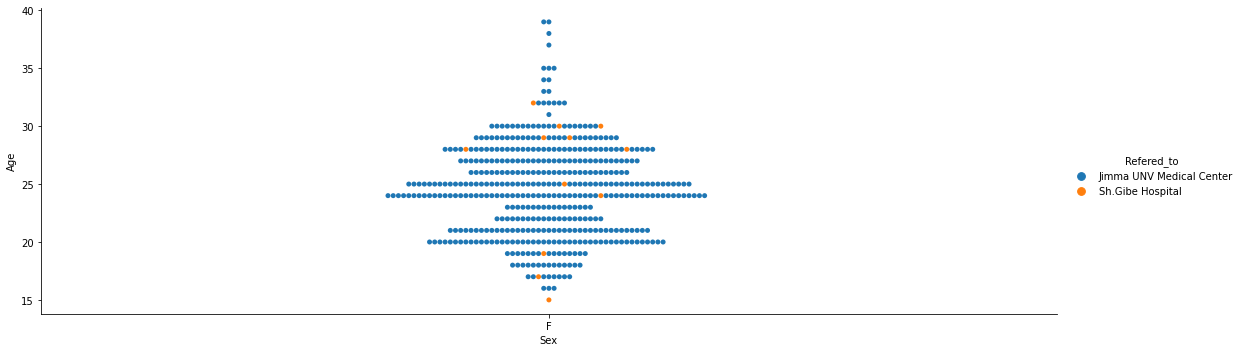

In [50]:
# Visulization of referred reason and age category based on the referred orginazation 
# e.g. x= Refered_to, Y=age and Z= reason_for referral_trans
# And also different combination of VIZ also explored 
@interact 
def catplot(x=list(hcrrldf.select_dtypes('object').columns), 
            y=list(hcrrldf.select_dtypes('number').columns)[1:],
            z=list(hcrrldf.select_dtypes('object').columns)[2:],
            theme=list(cf.getThemes()), 
            colorscale=list(cf.colors._scales_names.keys())):
    sns.catplot(x=x, y=y, hue=z,aspect=3,kind="swarm",  data=hcrrldf);

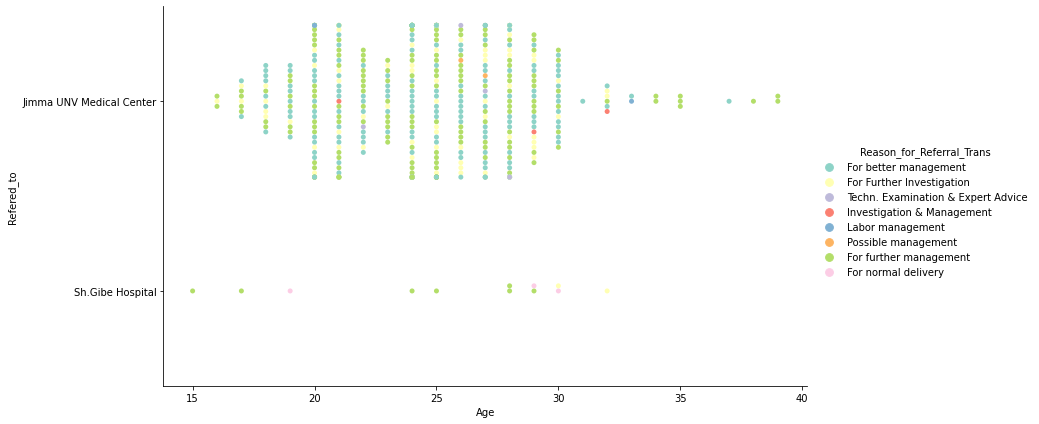

In [51]:
@interact 
def catplot(
    style="ticks", 
    color_codes=True,
    height=widgets.IntSlider(min=3, max=30, step=1, value=6), 
    aspect=widgets.IntSlider(min=1, max=30, step=1, value=2)):
    sns.catplot(x="Age", y="Refered_to", hue="Reason_for_Referral_Trans",height=height, aspect=aspect,
                kind="swarm",orient="h",palette="Set3", data=hcrrldf);


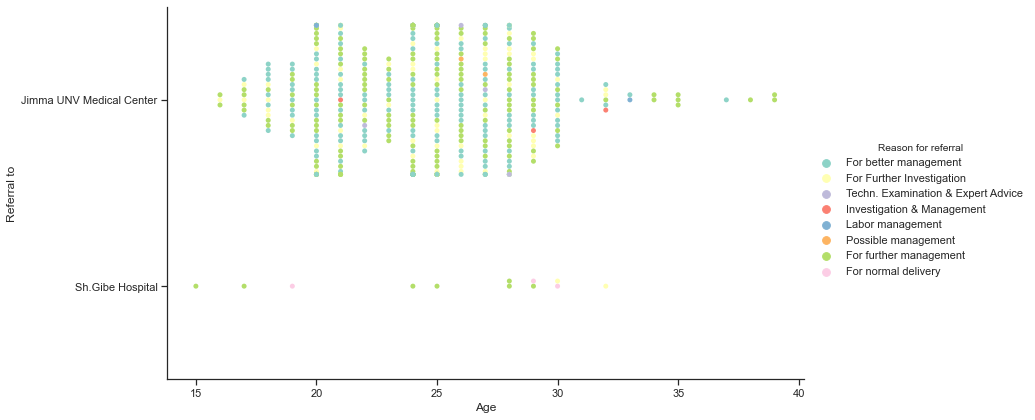

In [52]:
# Here is important for analysis: The summary of Age, Referral reason and Referred hospital
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

g=sns.catplot(x="Age", y="Refered_to", hue="Reason_for_Referral_Trans",kind="swarm",orient="h",height=6, aspect=2, palette="Set3",  data=hcrrldf);
plt.xlabel('Age')
plt.ylabel('Referral to')
legend = g._legend
legend.set_title("Reason for referral")

6. Analysis of the disease after  aligning with ICPC-2 and ICD-11 classfication

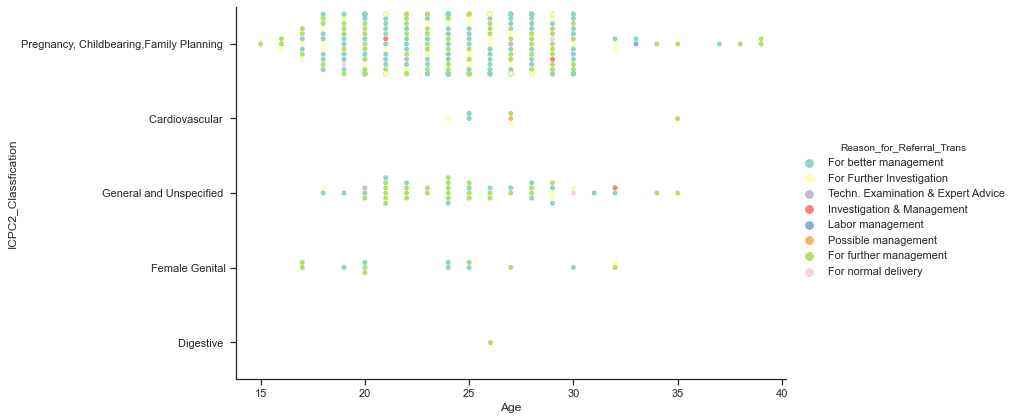

In [53]:
# Here is important for analysis: The summary of Age, Referral reason and Referred hospital
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sns.catplot(x="Age", y="ICPC2_Classfication", hue="Reason_for_Referral_Trans",kind="swarm",orient="h",height=6, aspect=2, palette="Set3",  data=hcrrldf);

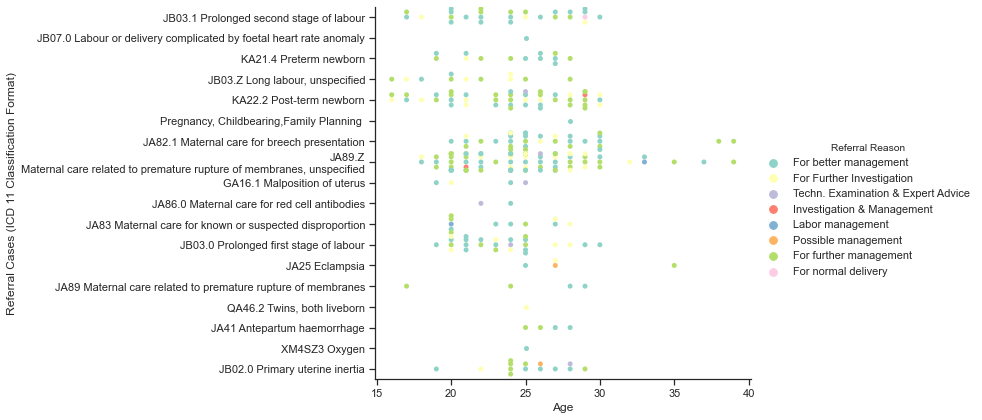

In [54]:
# Here is important for analysis: The summary of Age, Referral reason and Referred hospital
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

g=sns.catplot(x="Age", y="ICD11_Classfication", hue="Reason_for_Referral_Trans",kind="swarm",orient="h",height=6, aspect=2, palette="Set3",  data=hcrrldf);
plt.xlabel('Age')
plt.ylabel('Referral Cases (ICD 11 Classification Format)')
legend = g._legend
legend.set_title("Referral Reason")

# Part -II:  Hospital RRL & Cardsheet: the dataset is collected randomly    

1. Importing  the referral data 

In [55]:
#jurr2data = pd.read_csv("Compiled_from_JUSH-Table 1.csv", encoding='utf-8')
#jurr2data = pd.read_csv("Compiled_from_JUSH_1.csv", encoding='utf-8')

# Hospital RRL and cardsheet  ... as per the classifcication of  ICPC2 and ICD11 
#import the referred hospitpal RRL and patient cardsheet (with ICPC-2 and ICD11 format)
jurr2data = pd.read_csv("FullHospRRL-Table 1.csv", encoding='utf-8')



In [56]:
jurr2data.shape

(201, 24)

In [57]:
jurr2data.columns

Index(['Number', 'Disease_Name', 'Reffered_Date', 'DateofArrivalintheHospital',
       'CollectedSignandSymptoms', 'writeallthefindingoftheds',
       'IsthereanyrelatedDswithYes\n', 'Related_Disease',
       'IsthereanyrelatedDswithNO\n', 'Reffered Reason', 'HC_Referral_Reason',
       'Appropriate Referral  (YES/NO)\n', 'Appropriate_Referral_Feedback',
       'FeedbackandConclusion', 'Disease_Name_Copy', 'CP',
       'ICPC2_Classfication', 'ICD11_Classfication', 'ICD11_Parent_Category',
       'MatchingTerms1 ', 'MatchingTerms2 ', 'MatchingTerms3',
       'MatchingTerms4', 'Descriptions'],
      dtype='object')

2. Splitting referral date in to Year, Month and Day

In [58]:
#splitting the date of arrival in the hospital into Year, Month and day
#Splitting the date into year, month and date
jurr2data['Reffered_Date'] = pd.to_datetime(jurr2data.Reffered_Date,errors='coerce')
jurr2data['Day'],jurr2data['Month'],jurr2data['Year'] = jurr2data.Reffered_Date.dt.day, jurr2data.Reffered_Date.dt.month, jurr2data.Reffered_Date.dt.year

#display the new RRL list  
#@interact
#def show_referral_by_age(column=["Year","Month"],x=(10,200,10)):
 #   return jurr2data.loc[jurr2data[column] >x]

In [59]:
jurr2data.head(1)

,Number,Disease_Name,Reffered_Date,DateofArrivalintheHospital,CollectedSignandSymptoms,writeallthefindingoftheds,IsthereanyrelatedDswithYes,Related_Disease,IsthereanyrelatedDswithNO,Reffered Reason,...,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions,Day,Month,Year
0,787403,Early rupture of memberain,2011-08-14,14/8/11,"bleeding,discharge,labour pain",PROM,NaN,No,NO,PROM+multiple pregnancy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,8.0,2011.0


3. Flitering by referral reason 

3.1. Filter by Referral Reason only

In [60]:
# Pop-up the RRL by referral reason only .... filter function is required 

#Step-1: a generic fucntion is rquired to capture uniques unique values 
ALL = 'ALL' 
def unique_sorted_values(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#Step-2: intialize a variable to capture the referral reason
reason4Referral = widgets.Dropdown(options =unique_sorted_values(jurr2data.HC_Referral_Reason),description="Ref. Reason")


referral_reason_output = widgets.Output()

#Step-3: Write an event-handeler function     
def referral_reason_eventhandler(change):
    referral_reason_output.clear_output() #the output didn't refersh when selecting a new referral reason rather it will append at the end
    with referral_reason_output:
        if (change.new == ALL):
            display(jurr2data)
        else:
            display(jurr2data[jurr2data.HC_Referral_Reason == change.new])
            
#Step-4 : Bind to the event handler to the dropdown value  
reason4Referral.observe(referral_reason_eventhandler, names='value')

# Step-5: Display the result
display(reason4Referral)
display(referral_reason_output)

Dropdown(description='Ref. Reason', options=('ALL', 'For Further Investigation ', 'For Further Investigation &…

Output()

3.2. Filtering by referral reason and feedback 

In [61]:
#RRL fliter by referred reason and feedback  
output = widgets.Output()

reason4Referral = widgets.Dropdown(options =unique_sorted_values(jurr2data.HC_Referral_Reason), description="Ref. Reason")
referredFeedback = widgets.Dropdown(options =unique_sorted_values(jurr2data.Appropriate_Referral_Feedback),description="Feedback: ")


def referral_flitering(referralReason, referralFeedback):
    output.clear_output()

    if (referralReason == ALL) & (referralFeedback == ALL):
        referral_fliter = jurr2data
    elif (referralReason == ALL):
        referral_fliter = jurr2data[jurr2data.Appropriate_Referral_Feedback == referralFeedback]
    elif (referralFeedback == ALL):
        referral_fliter = jurr2data[jurr2data.HC_Referral_Reason == referralReason]
    else:
        referral_fliter = jurr2data[(jurr2data.HC_Referral_Reason == referralReason) & 
                                  (jurr2data.Appropriate_Referral_Feedback == referralFeedback)]
    
    with output:
        display(referral_fliter)
        
def referral_reason_eventhandler(change):
    referral_flitering(change.new, reason4Referral.value)
def referral_feedback_eventhandler(change):
    referral_flitering(reason4Referral.value, change.new)
    
reason4Referral.observe(referral_reason_eventhandler, names='value')
referredFeedback.observe(referral_feedback_eventhandler, names='value')

display(reason4Referral)
display(referredFeedback)
display(output)

Dropdown(description='Ref. Reason', options=('ALL', 'For Further Investigation ', 'For Further Investigation &…

Dropdown(description='Feedback: ', options=('ALL', 'No', 'Not Listed ', 'Yes'), value='ALL')

Output()

4. Visual inspection of the RRL-in clincal data

4.1. Construting histogram for categorical values

In [62]:
#building Histogram for categorical values or objects 
@interact 
def hist(x=list(jurr2data.select_dtypes('object').columns),
                 #theme=list(cf.themes.THEMES.keys()), 
                 theme=list(cf.getThemes()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    jurr2data[x].iplot(kind='hist', x=x, mode='markers', xTitle='x',
                   yTitle='count', title='Distribution',
                   theme=theme, colorscale=colorscale)

In [63]:
#building Histogram for categorical values or objects 
@interact 
def hist(x=list(jurr2data.select_dtypes('object').columns),
                 #theme=list(cf.themes.THEMES.keys()), 
                 theme=list(cf.getThemes()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    jurr2data[x].iplot(kind='hist', x=x, mode='markers', xTitle='x',
                   yTitle='count', title='Distribution',
                   theme=theme, colorscale=colorscale)

4.2. Exploring the frequencey or the summary of based on a certain attributes. This helps to visulize the frequencey of the flow of refferal based on the two selected data attributes.

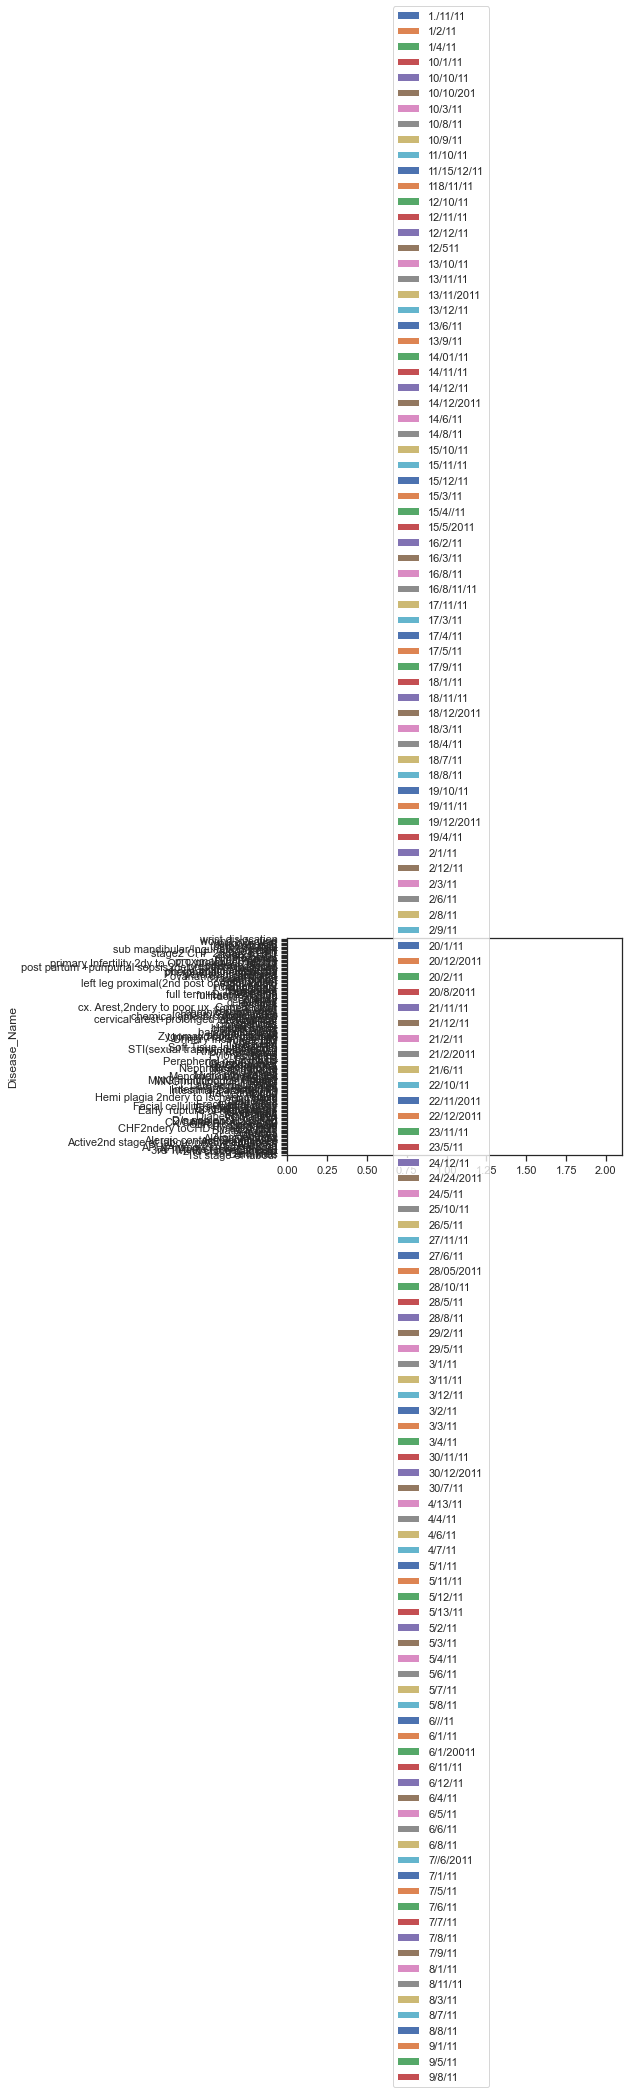

In [64]:
#Implmentaitng cross tab between two variables 
@interact 
def crosstab(x=list(jurr2data.select_dtypes('object').columns), 
             y=list(jurr2data.select_dtypes('object').columns)[1:],
             theme=list(cf.getThemes()), 
             colorscale=list(cf.colors._scales_names.keys())):
    pd.crosstab(jurr2data[x],jurr2data[y]).plot.barh().legend(loc='center left', bbox_to_anchor=(0.3, 0.5))

4.3. Exploring the frequencey or the summary of based on a certain attributes. This helps to visulize the frequencey of the flow of refferal based on the three selected data attributes.

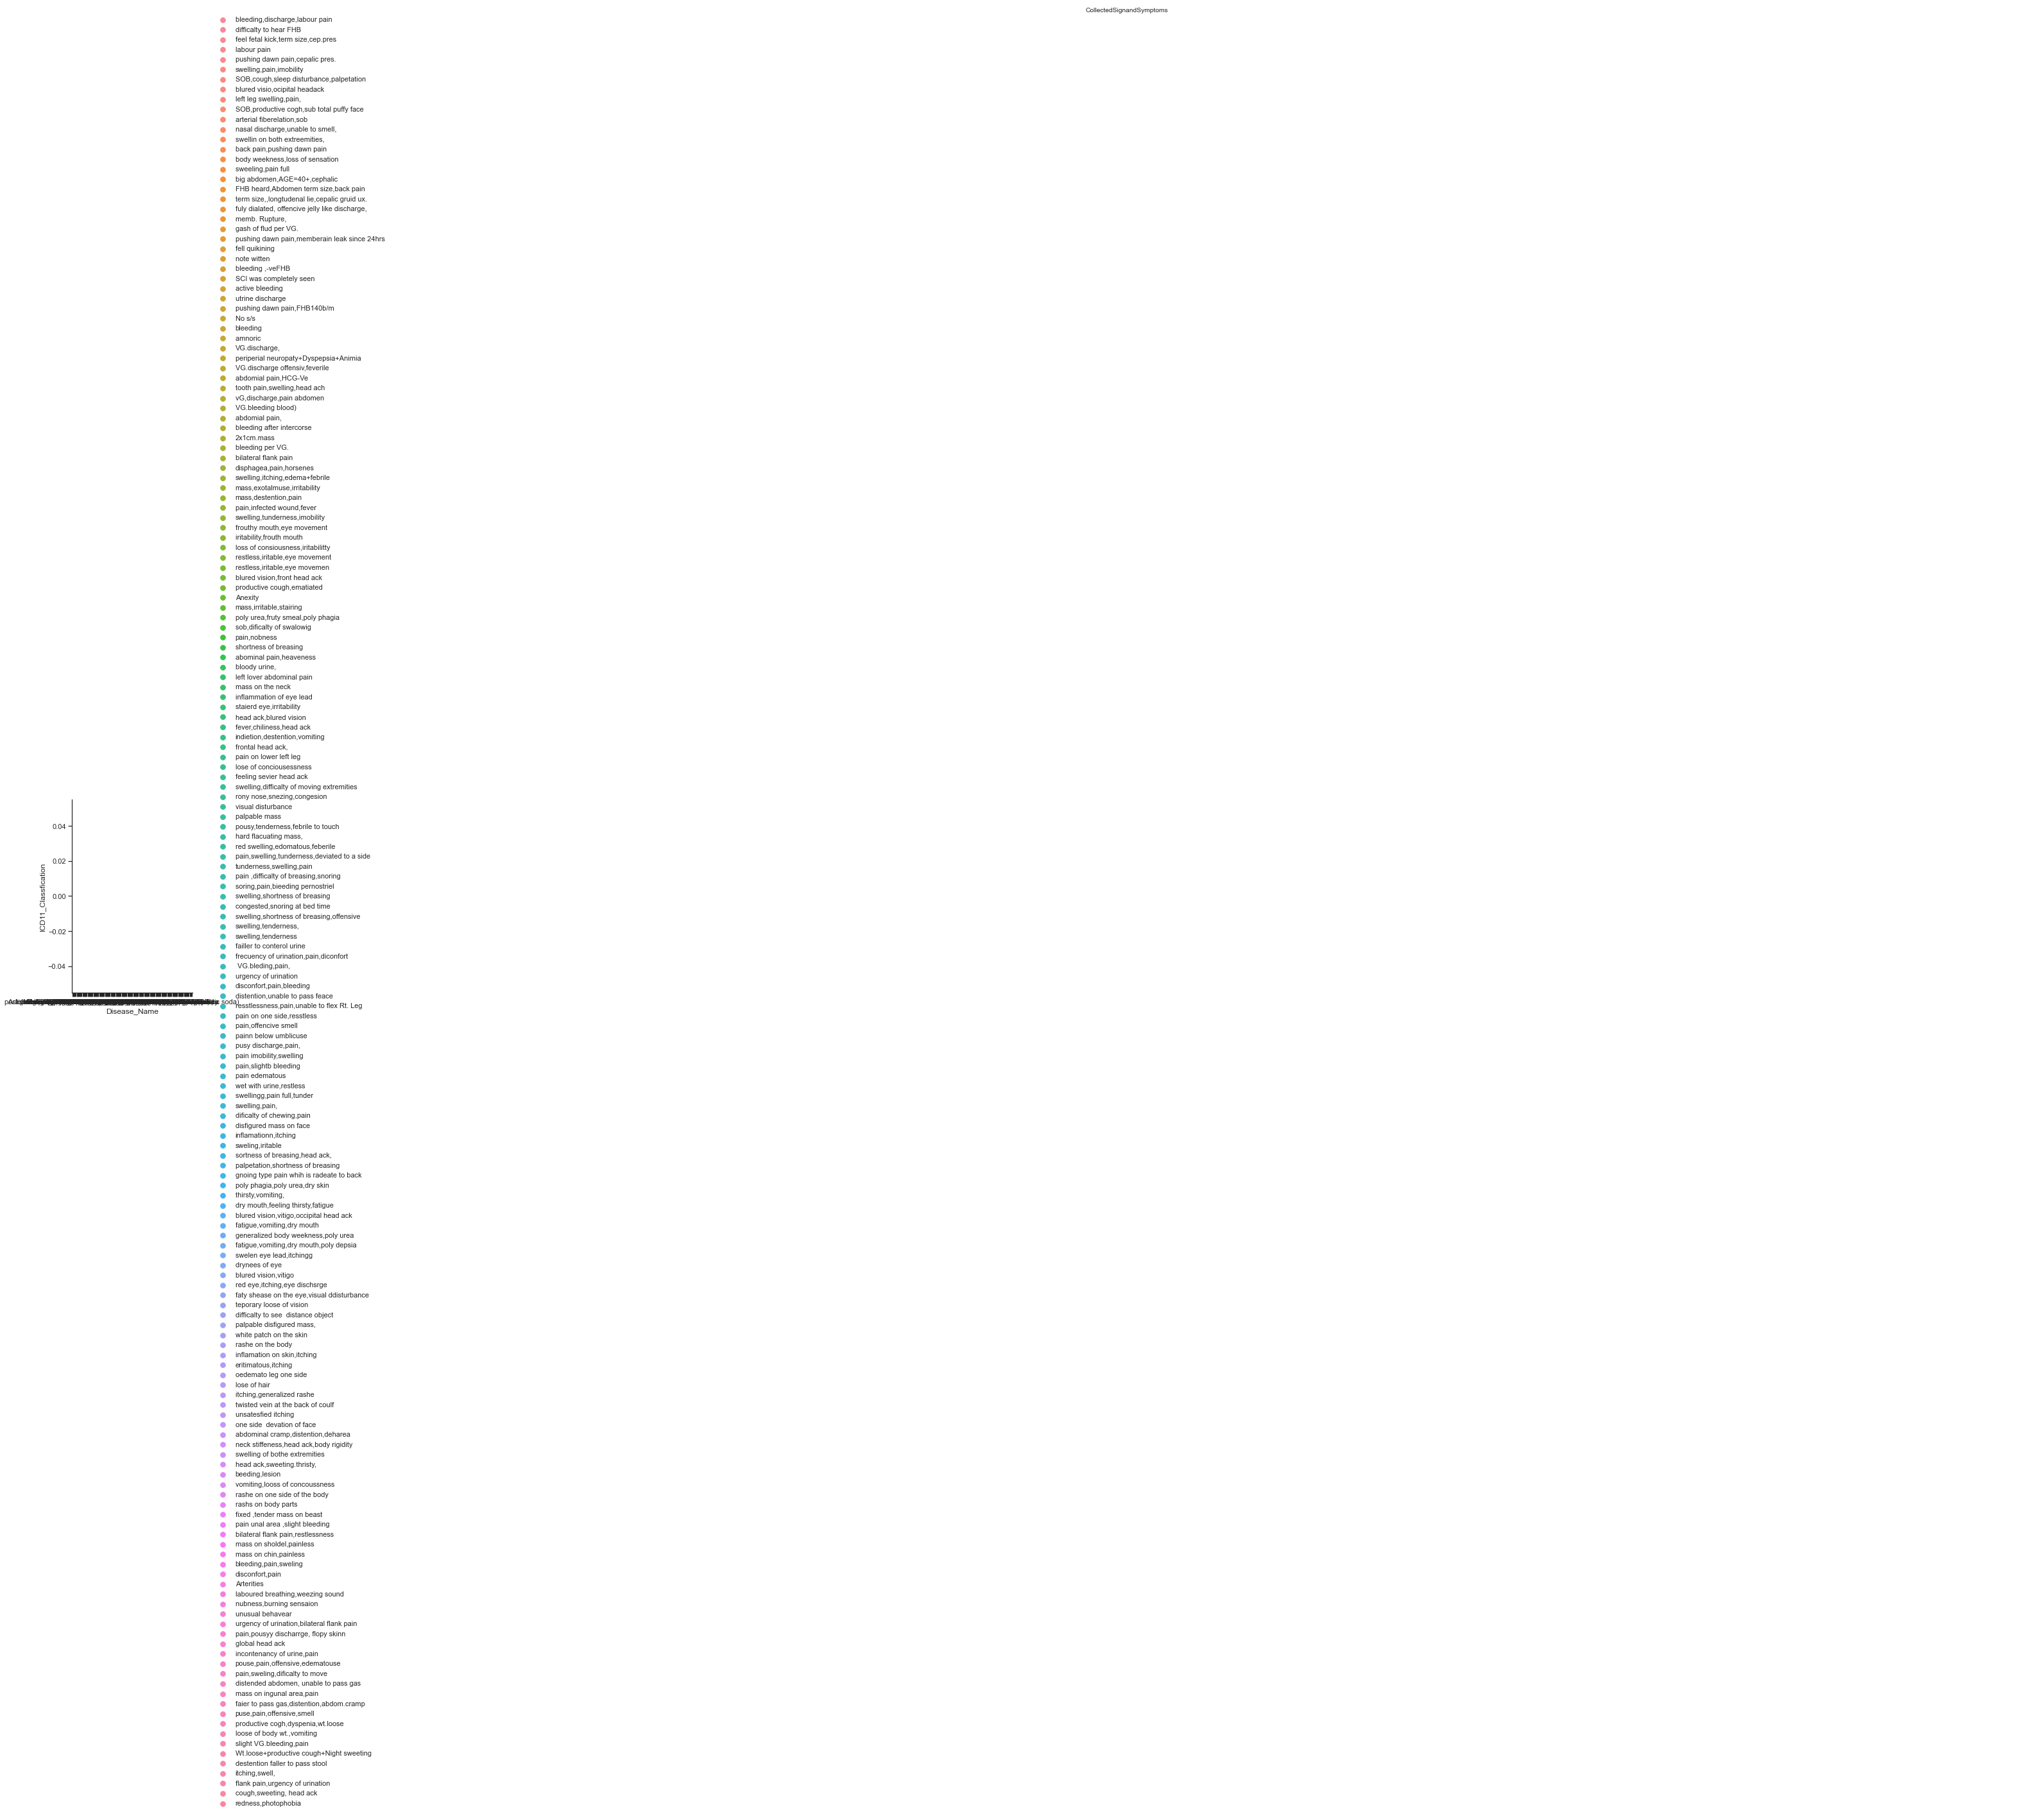

In [65]:
# Summary of x= feedback monthly summary with respect to referral reason using hospital RRL and Cardsheet 
#1. try x = referral feedabck, y= month and z = health center referral reason 
#2. try x = referral feedabck, y= month and z = ICPC2 classfication
@interact 
def catplot(x=list(jurr2data.select_dtypes('object').columns), 
            y=list(jurr2data.select_dtypes('number').columns)[1:],
            z=list(jurr2data.select_dtypes('object').columns)[2:],
            theme=list(cf.getThemes()), 
            colorscale=list(cf.colors._scales_names.keys())):
    sns.catplot(x=x, y=y, hue=z,aspect=2,kind="swarm",  data=jurr2data);

### Exploring referral feedback and conclusion

In [66]:
jurr2data['Appropriate_Referral_Feedback'].value_counts()

Yes            169
No              29
Not Listed       3
Name: Appropriate_Referral_Feedback, dtype: int64

In [27]:
#jurr2data.groupby('Appropriate_Referral_Feedback').mean()
#jurr2data[["Appropriate_Referral_Feedback"]].describe()
jurr2data['Appropriate_Referral_Feedback'].value_counts(normalize=True) * 100

Yes            84.079602
No             14.427861
Not Listed      1.492537
Name: Appropriate_Referral_Feedback, dtype: float64

Text(0, 0.5, 'Hospital Referral Feedback and Conclusion')

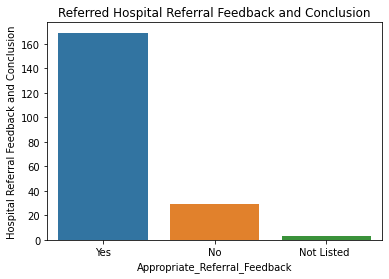

In [14]:
sns.countplot(x="Appropriate_Referral_Feedback", data=jurr2data)
plt.title('Referred Hospital Referral Feedback and Conclusion')
plt.ylabel("Number of referral cases")
plt.ylabel("Hospital Referral Feedback and Conclusion")

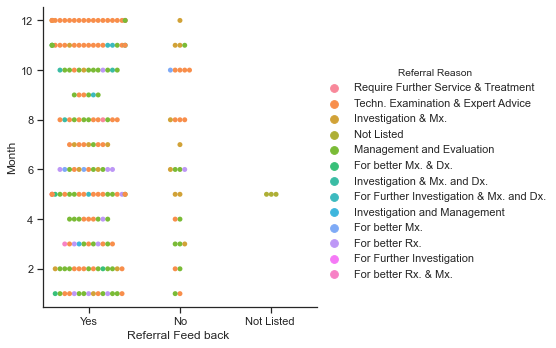

In [37]:
g=sns.catplot(x="Appropriate_Referral_Feedback", y="Month", hue="HC_Referral_Reason",kind="swarm",aspect=1,  data=jurr2data);
plt.xlabel('Referral Feed back ')
plt.ylabel('Month')
legend = g._legend
legend.set_title("Referral Reason")

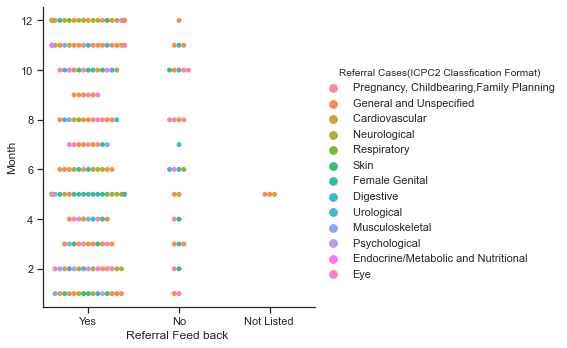

In [38]:
g=sns.catplot(x="Appropriate_Referral_Feedback", y="Month", hue="ICPC2_Classfication",kind="swarm",aspect=1,  data=jurr2data);
plt.xlabel('Referral Feed back ')
plt.ylabel('Month')
legend = g._legend
legend.set_title("Referral Cases(ICPC2 Classfication Format)")

# Part III - Comparing Healthcenter RRL-out and Reffered Hopspital RRL-in and Cardsheet Data

1. Referral Reason: Visualization of healthcenter referral based on RRL-out reason

<AxesSubplot:title={'center':'Referral Registration Logbook'}, xlabel='Referral Reason', ylabel='Summary'>

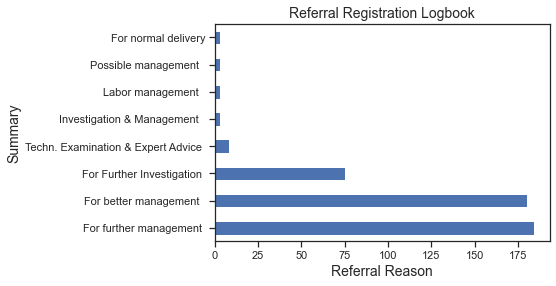

In [39]:
#Summary of referral reason distrubtion using health center RRL
rage = hcrrldf.Reason_for_Referral_Trans
xp = rage.value_counts()
plt.title('Referral Registration Logbook', fontsize=14)
plt.xlabel('Referral Reason', fontsize=14)
plt.ylabel('Summary', fontsize=14)
xp.plot(kind='barh')

2. Referral Reason: Visualization based on referred hospital based on RRL-in and cardsheet 

<AxesSubplot:title={'center':'Referral Registration Logbook'}, xlabel='Referral Reason', ylabel='Summary'>

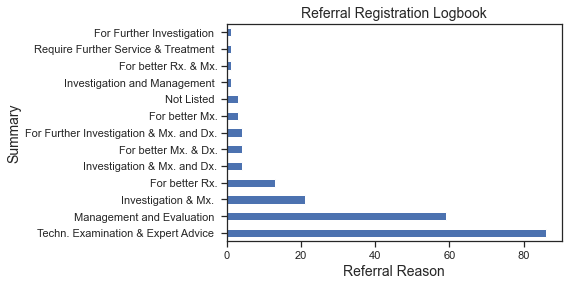

In [40]:
#Exploring the distrubtion of referral using hospital RRL and Cardsheet
rage = jurr2data.HC_Referral_Reason
xp = rage.value_counts()
plt.title('Referral Registration Logbook', fontsize=14)
plt.xlabel('Referral Reason', fontsize=14)
plt.ylabel('Summary', fontsize=14)
xp.plot(kind='barh')

3. Visualization the RRL-out at the health center relative to RRL-in and card sheet referral reasoning  

In [41]:
# Compute RRL-out and RRL-in aggreagted Matrix using crosstabs() Method: Categorical Columns
pd.crosstab(index=hcrrldf['Reason_for_Referral_Trans'],columns=jurr2data['HC_Referral_Reason'],
            #colnames=jurr2data['Appropriate_Referral_Trans'],
            margins=True).rename(columns={"RRL_Out": "Count by Reason", "RRL_in": "Count by reason"}).style.background_gradient(cmap='Reds')

HC_Referral_Reason,For Further Investigation,For Further Investigation & Mx. and Dx.,For better Mx.,For better Mx. & Dx.,For better Rx.,For better Rx. & Mx.,Investigation & Mx.,Investigation & Mx. and Dx.,Investigation and Management,Management and Evaluation,Not Listed,Require Further Service & Treatment,Techn. Examination & Expert Advice,All
Reason_for_Referral_Trans,,,,,,,,,,,,,,
For Further Investigation,1,0,0,2,0,0,1,0,0,6,2,0,12,24
For better management,0,2,1,0,10,0,11,1,1,22,1,1,41,91
For further management,0,2,2,2,2,1,7,3,0,27,0,0,28,74
For normal delivery,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Investigation & Management,0,0,0,0,1,0,0,0,0,0,0,0,1,2
Labor management,0,0,0,0,0,0,0,0,0,1,0,0,1,2
Possible management,0,0,0,0,0,0,1,0,0,1,0,0,0,2
Techn. Examination & Expert Advice,0,0,0,0,0,0,0,0,0,2,0,0,3,5
All,1,4,3,4,13,1,21,4,1,59,3,1,86,201


In [42]:
# Compute RRL-out and RRL-in aggreagted Matrix using crosstabs() Method: Categorical Columns
pd.crosstab(index=jurr2data['HC_Referral_Reason'],columns=hcrrldf['Reason_for_Referral_Trans'],
            #colnames=jurr2data['Appropriate_Referral_Trans'],
            margins=True).style.background_gradient(cmap='Reds')

Reason_for_Referral_Trans,For Further Investigation,For better management,For further management,For normal delivery,Investigation & Management,Labor management,Possible management,Techn. Examination & Expert Advice,All
HC_Referral_Reason,,,,,,,,,
For Further Investigation,1,0,0,0,0,0,0,0,1
For Further Investigation & Mx. and Dx.,0,2,2,0,0,0,0,0,4
For better Mx.,0,1,2,0,0,0,0,0,3
For better Mx. & Dx.,2,0,2,0,0,0,0,0,4
For better Rx.,0,10,2,0,1,0,0,0,13
For better Rx. & Mx.,0,0,1,0,0,0,0,0,1
Investigation & Mx.,1,11,7,1,0,0,1,0,21
Investigation & Mx. and Dx.,0,1,3,0,0,0,0,0,4
Investigation and Management,0,1,0,0,0,0,0,0,1


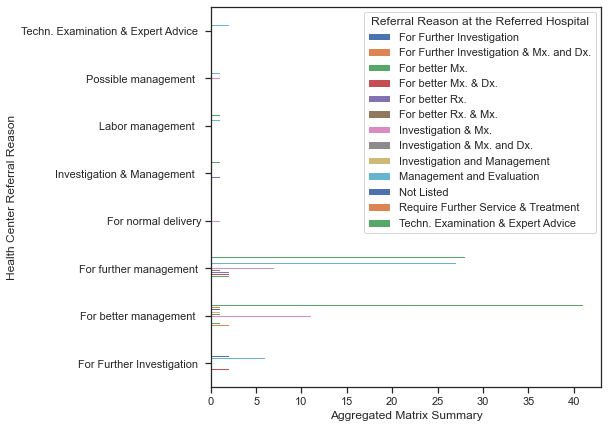

In [43]:
#Implmentaitng cross tab between two variables the referral reason between RRL and RRL-in
#jurr2data['Appropriate_Referral_Trans']
#Crosstab referral reasoning matrix between Health center RRL-out and referred Hosp RRLin and Cardshet


@interact 
def crosstab(x=widgets.IntSlider(min=0, max=30, step=1, value=7),
             y=widgets.IntSlider(min=0, max=30, step=1, value=7)):
    pd.crosstab(hcrrldf['Reason_for_Referral_Trans'],jurr2data['HC_Referral_Reason']).plot.barh(figsize=(x,y)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Aggregated Matrix Summary")
    #by Referral Reason:Computed based on RRL-out and RRL-in
    plt.ylabel("Health Center Referral Reason")
    legend = g._legend
    plt.legend(title="Referral Reason at the Referred Hospital")
    legend.set_title("Referral Reason at the Referred Hospital")

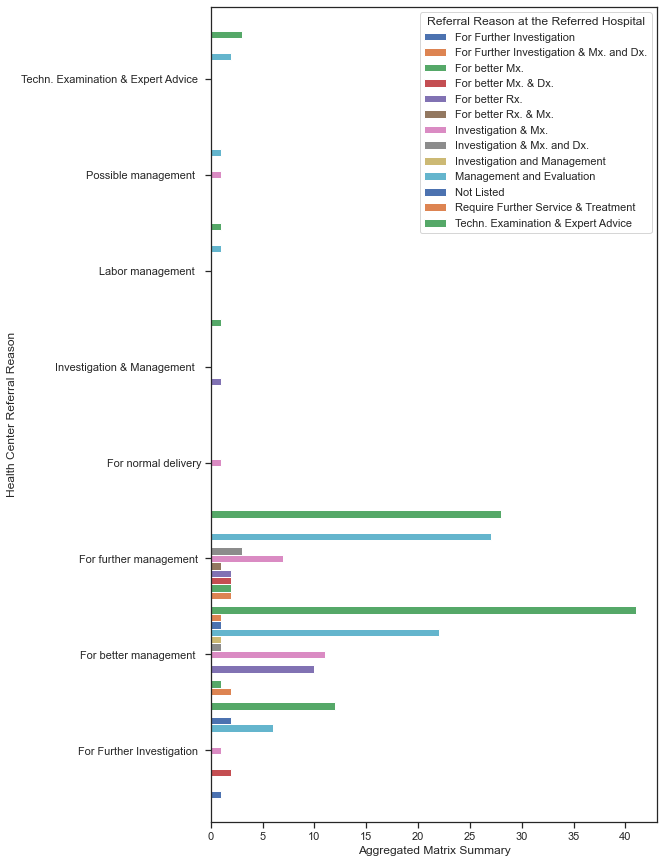

In [44]:
c = pd.crosstab(hcrrldf['Reason_for_Referral_Trans'],jurr2data['HC_Referral_Reason'])
c.plot.barh(figsize=(8,15), width=1)
#.plot.barh(figsize=(10,5)).legend(loc='center left', bbox_to_anchor=(0.5, 0.5))
plt.xlabel("Aggregated Matrix Summary")
#by Referral Reason:Computed based on RRL-out and RRL-in
plt.ylabel("Health Center Referral Reason")
legend = g._legend
plt.legend(title="Referral Reason at the Referred Hospital")
legend.set_title("Referral Reason at the Referred Hospital")

In [45]:
jurr2data.head(1)

,Number,Disease_Name,Reffered_Date,DateofArrivalintheHospital,CollectedSignandSymptoms,writeallthefindingoftheds,IsthereanyrelatedDswithYes,Related_Disease,IsthereanyrelatedDswithNO,Reffered Reason,...,ICD11_Classfication,ICD11_Parent_Category,MatchingTerms1,MatchingTerms2,MatchingTerms3,MatchingTerms4,Descriptions,Day,Month,Year
0,787403,Early rupture of memberain,2011-08-14,14/8/11,"bleeding,discharge,labour pain",PROM,NaN,No,NO,PROM+multiple pregnancy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,8.0,2011.0


In [46]:
#Creating a new dataset for comparing the health center dataset and the hospital dataset 

# referral information from the the health center   
hc_referralReason=hcrrldf.Reason_for_Referral_Trans
hc_disease_name = hcrrldf.Type_of_Disease

# referral information from the referred hospital 
hospital_diseaseName = jurr2data.Disease_Name
hospital_referralReason = jurr2data.Referred_Reason_Trans
hospital_feedback = jurr2data.Appropriate_Referral_Trans


AttributeError: 'DataFrame' object has no attribute 'Type_of_Disease'

In [ ]:
count = jurr2data.Referred_Reason_Trans.value_counts()
count1 = hcrrldf.Reason_for_Referral_Trans.value_counts()


g = sns.PairGrid(hcrrldf, vars=['Age', 'Reason_for_Referral_Trans'],
                 hue='Year', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
#Creating a new dataframe from healthcenter referral log book and Hospital RRL and cardsheet

# create a temporaliy copy of df using the selected attributes from the two dataset sources 

# since the dataset collected from the Hopspital RRL is 201 and need to randomly copy 201 records from the source and create comparsiondf
comparisiond201Sample = hcrrldf.sample(201)
comparisiondf = comparisiond201Sample[['Type_of_Disease','Reason_for_Referral_Trans']].copy()
comparisiondf2 = jurr2data[['Disease_Name','Referred_Reason_Trans','Appropriate_Referral_Trans']].copy()


In [ ]:
# concat the selected copy of attributes 
comparisiondf3 = pd.concat([comparisiondf, comparisiondf2], axis=1)

In [ ]:
#The summary of the health center referral summary
countVal = comparisiondf3.Reason_for_Referral_Trans
xp = countVal.value_counts()
plt.title('RRL Viz', fontsize=14)
plt.xlabel('Satus', fontsize=14)
plt.ylabel('Summary', fontsize=14)
xp.plot(kind='bar')

In [ ]:
#The summary of the referral reason at referred hospital RRL Sheet and Cardsheet
countVal = comparisiondf3.Referred_Reason_Trans
xp = countVal.value_counts()
plt.title('RRL Viz', fontsize=14)
plt.xlabel('Satus', fontsize=14)
plt.ylabel('Summary', fontsize=14)
xp.plot(kind='bar')